# Parte 1. Preparacion de los datos

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [69]:
df = pd.read_csv('/datasets/logs_exp_us.csv', delimiter = '\t')

In [70]:
print(df.head())

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248


In [71]:
df.columns = ('evento', 'usuarioId', 'hora_evento', 'ExpId')

In [72]:
print(df.head())

                    evento            usuarioId  hora_evento  ExpId
0         MainScreenAppear  4575588528974610257   1564029816    246
1         MainScreenAppear  7416695313311560658   1564053102    246
2  PaymentScreenSuccessful  3518123091307005509   1564054127    248
3         CartScreenAppear  3518123091307005509   1564054127    248
4  PaymentScreenSuccessful  6217807653094995999   1564055322    248


In [73]:
print(df.isna().sum())

evento         0
usuarioId      0
hora_evento    0
ExpId          0
dtype: int64


In [74]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   evento       244126 non-null  object
 1   usuarioId    244126 non-null  int64 
 2   hora_evento  244126 non-null  int64 
 3   ExpId        244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None


In [75]:
df['fecha_hora'] = pd.to_datetime(df['hora_evento'], unit='s')

In [76]:
df['fecha'] = df['fecha_hora'].dt.date

In [77]:
print(df.head())

                    evento            usuarioId  hora_evento  ExpId  \
0         MainScreenAppear  4575588528974610257   1564029816    246   
1         MainScreenAppear  7416695313311560658   1564053102    246   
2  PaymentScreenSuccessful  3518123091307005509   1564054127    248   
3         CartScreenAppear  3518123091307005509   1564054127    248   
4  PaymentScreenSuccessful  6217807653094995999   1564055322    248   

           fecha_hora       fecha  
0 2019-07-25 04:43:36  2019-07-25  
1 2019-07-25 11:11:42  2019-07-25  
2 2019-07-25 11:28:47  2019-07-25  
3 2019-07-25 11:28:47  2019-07-25  
4 2019-07-25 11:48:42  2019-07-25  


# Parte 2 Estudio de los datos

In [78]:
print('Valores unicos de cada columna\n', df.nunique())

Valores unicos de cada columna
 evento              5
usuarioId        7551
hora_evento    176654
ExpId               3
fecha_hora     176654
fecha              14
dtype: int64


In [79]:
print('Eventos unicos: \n', df['evento'].unique())

Eventos unicos: 
 ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']


In [80]:
no_eventos_por_usuario = df.groupby('usuarioId')['evento'].count()
print(no_eventos_por_usuario.mean())

32.33028737915508


In [81]:
print(no_eventos_por_usuario.describe())

count    7551.000000
mean       32.330287
std        65.312344
min         1.000000
25%         9.000000
50%        20.000000
75%        37.500000
max      2308.000000
Name: evento, dtype: float64


In [82]:
periodo_de_tiempo = df['fecha'].max() - df['fecha'].min()

In [83]:
print(periodo_de_tiempo)

13 days, 0:00:00


In [84]:
print(df['fecha'].describe())

count         244126
unique            14
top       2019-08-01
freq           36229
Name: fecha, dtype: object


In [85]:
print(df['fecha'].max())
print(df['fecha'].min())

2019-08-07
2019-07-25


In [86]:
print(df['fecha'].unique())

[datetime.date(2019, 7, 25) datetime.date(2019, 7, 26)
 datetime.date(2019, 7, 27) datetime.date(2019, 7, 28)
 datetime.date(2019, 7, 29) datetime.date(2019, 7, 30)
 datetime.date(2019, 7, 31) datetime.date(2019, 8, 1)
 datetime.date(2019, 8, 2) datetime.date(2019, 8, 3)
 datetime.date(2019, 8, 4) datetime.date(2019, 8, 5)
 datetime.date(2019, 8, 6) datetime.date(2019, 8, 7)]


In [87]:
conteo_fechas = df['fecha'].value_counts().sort_index()

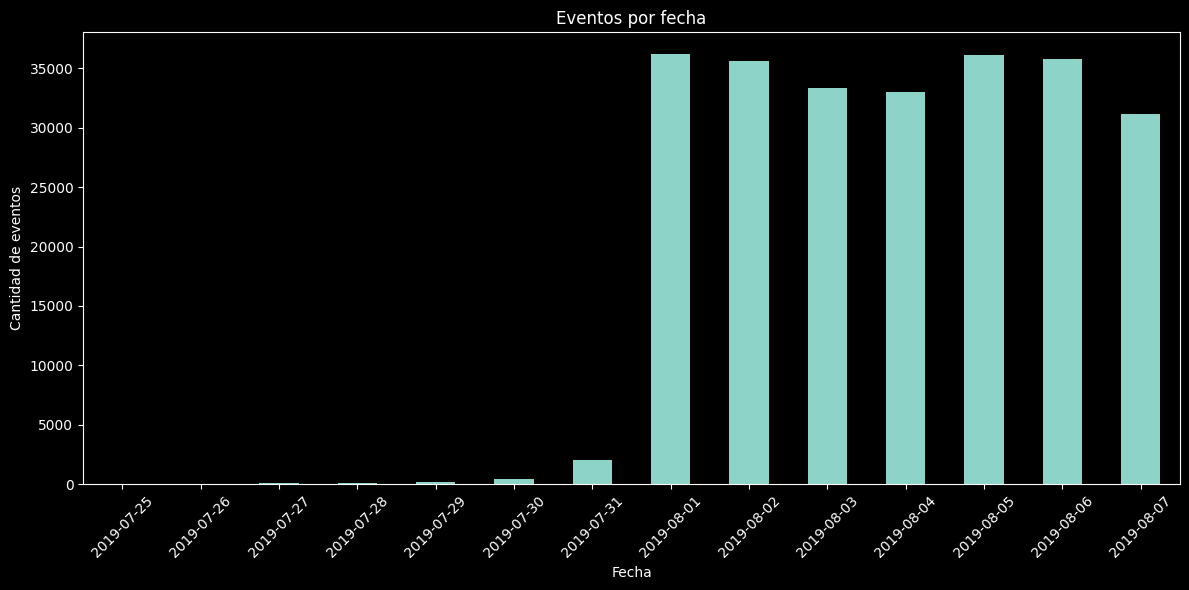

In [88]:
plt.figure(figsize=(12,6))
conteo_fechas.plot(kind='bar')
plt.title("Eventos por fecha")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de eventos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

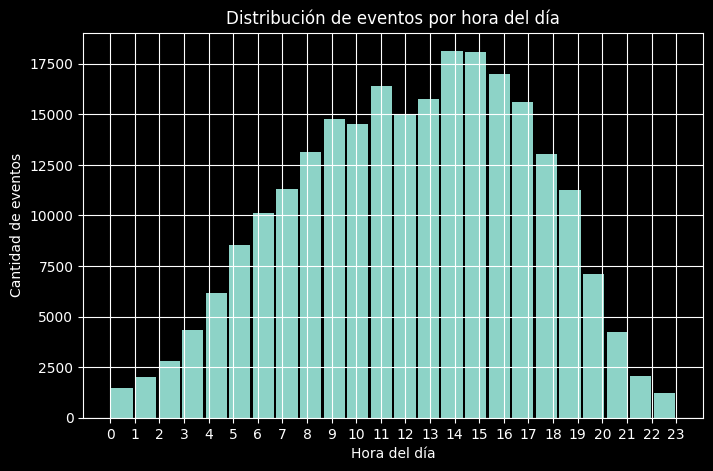

In [89]:
df['Hour'] = df['fecha_hora'].dt.hour

# Graficar histograma
plt.figure(figsize=(8,5))
df['Hour'].plot(kind='hist', bins=24, rwidth=0.9)
plt.title("Distribución de eventos por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de eventos")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [90]:
df_filtrados = df[df['fecha'] > pd.to_datetime('2019-08-01')]

In [91]:
print(df['fecha'].dtype)

object


In [92]:
print(df_filtrados['fecha'].dtype)

object


In [93]:
print(df_filtrados.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205069 entries, 39057 to 244125
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   evento       205069 non-null  object        
 1   usuarioId    205069 non-null  int64         
 2   hora_evento  205069 non-null  int64         
 3   ExpId        205069 non-null  int64         
 4   fecha_hora   205069 non-null  datetime64[ns]
 5   fecha        205069 non-null  object        
 6   Hour         205069 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 12.5+ MB
None


In [94]:
print('Numero de eventos perdidos despues de filtrar: ', df['evento'].count() - df_filtrados['evento'].count())

Numero de eventos perdidos despues de filtrar:  39057


In [95]:
print('Numero de usuarios unicos perdidos despues de filtrar: ', df['usuarioId'].nunique() - df_filtrados['usuarioId'].nunique())

Numero de usuarios unicos perdidos despues de filtrar:  265


In [96]:
print('Numero de usuarios unicos sin filtrar: ', df['usuarioId'].nunique(), '\nNumero de usuarios unicos despues de filtrar: ', df_filtrados['usuarioId'].nunique())

Numero de usuarios unicos sin filtrar:  7551 
Numero de usuarios unicos despues de filtrar:  7286


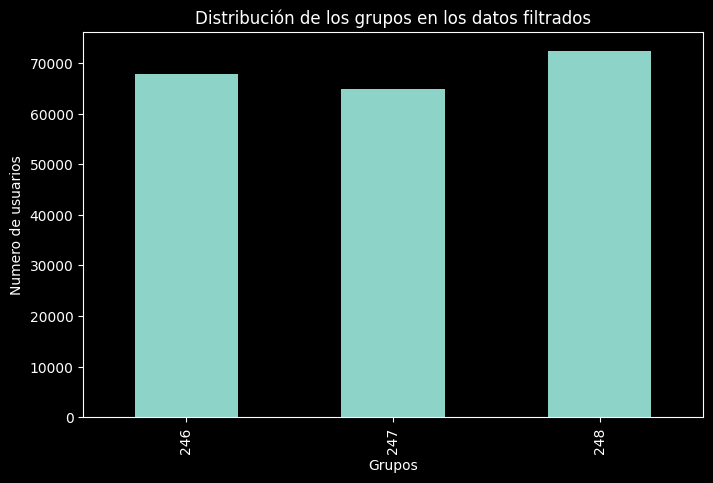

In [97]:
numero_por_grupo = df_filtrados.groupby('ExpId')['usuarioId'].count()

plt.figure(figsize=(8,5))
numero_por_grupo.plot(kind='bar')
plt.title("Distribución de los grupos en los datos filtrados")
plt.xlabel("Grupos")
plt.ylabel("Numero de usuarios")
plt.show()

In [98]:
print('Numero de usuarios por grupo: \n', numero_por_grupo)

Numero de usuarios por grupo: 
 ExpId
246    67844
247    64811
248    72414
Name: usuarioId, dtype: int64


La mayor parte de los datos estan englobados entre los dias 2019-08-01 al 2019-08-07, los grupos 246, 247 y 248 recibieron 67844, 64811 y 72412 movimientos por usuarios respectivamente

In [99]:
distribucion_eventos = df_filtrados.groupby('evento')['usuarioId'].count()

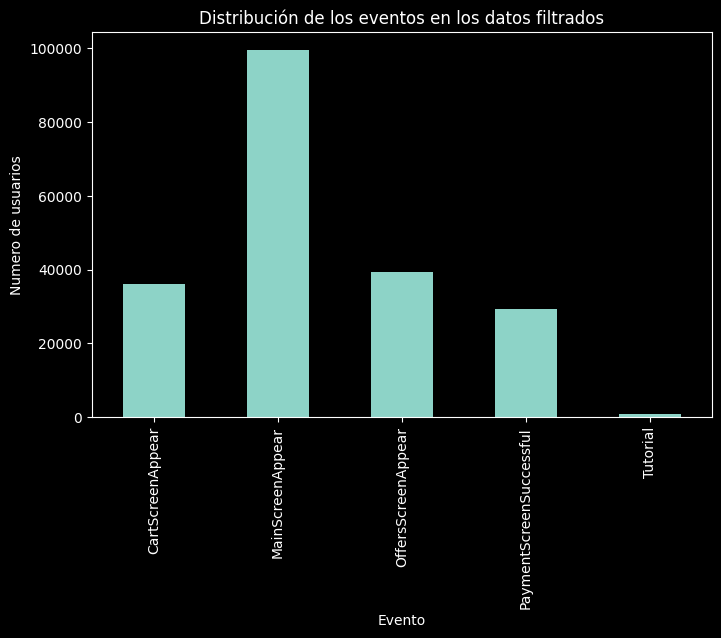

In [100]:
plt.figure(figsize=(8,5))
distribucion_eventos.plot(kind='bar')
plt.title("Distribución de los eventos en los datos filtrados")
plt.xlabel("Evento")
plt.ylabel("Numero de usuarios")
plt.show()

In [101]:
distribucion_eventos_sinfiltar = df.groupby('evento')['usuarioId'].count()

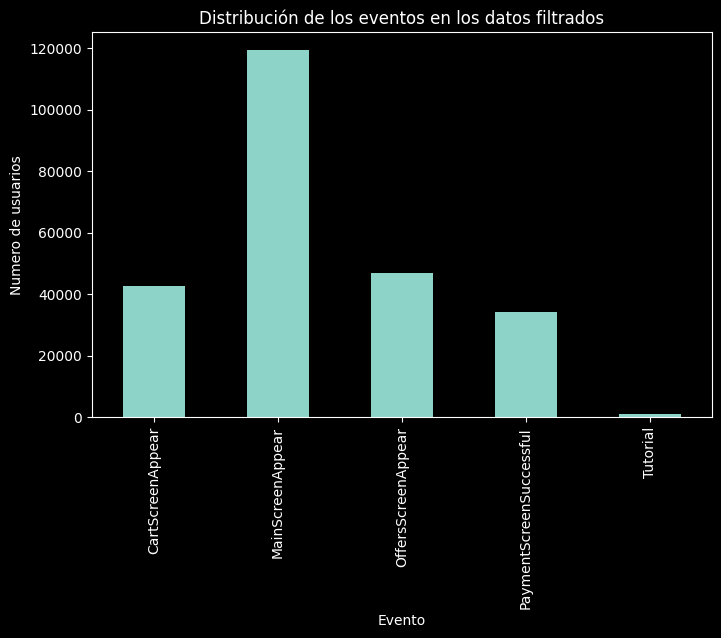

In [102]:
plt.figure(figsize=(8,5))
distribucion_eventos_sinfiltar.plot(kind='bar')
plt.title("Distribución de los eventos en los datos filtrados")
plt.xlabel("Evento")
plt.ylabel("Numero de usuarios")
plt.show()

In [103]:
print(distribucion_eventos.sort_values(ascending = False))

evento
MainScreenAppear           99474
OffersScreenAppear         39359
CartScreenAppear           36134
PaymentScreenSuccessful    29311
Tutorial                     791
Name: usuarioId, dtype: int64


In [104]:
proporcion_eventos = (distribucion_eventos / distribucion_eventos['MainScreenAppear'])*100

In [105]:
print(proporcion_eventos.sort_values(ascending = False))

evento
MainScreenAppear           100.000000
OffersScreenAppear          39.567123
CartScreenAppear            36.325070
PaymentScreenSuccessful     29.465991
Tutorial                     0.795183
Name: usuarioId, dtype: float64


Debido al numero de usuarios que completa las acciones se propone que el orden de las acciones es la siguiente:
1. Tutorial  
2. Main Screen Appear / Pantalla principal    
3. Offers Screen Appear / Pantalla de ofertas        
4. Cart Screen Appear / Pantalla del carrito 
5. Payment Screen Successful / Pantalla de pago exitosa

Si bien solo el 0.79 de los usuarios completo el tutoria, lo mas probable es que la mayoria de usuarios se saltaran el tutorial, y los que lo completaron solo tuvieron que hacerlo una vez. De ser asi, la mayoria de los usuarios se perdieron en la pantalla de oferta. Aproximadamente el 29.5% de los usuarios completaron todos los pasos hasta llegar a la compra
El filtrado de los datos no altero la distribucion de los datos

In [106]:
df_funnel = proporcion_eventos.reset_index()
df_funnel.columns = ['Evento', 'Porcentaje']
orden = [
    'MainScreenAppear',
    'OffersScreenAppear',
    'CartScreenAppear',
    'PaymentScreenSuccessful',
    'Tutorial'
]

df_funnel = df_funnel.set_index('Evento').loc[orden].reset_index()


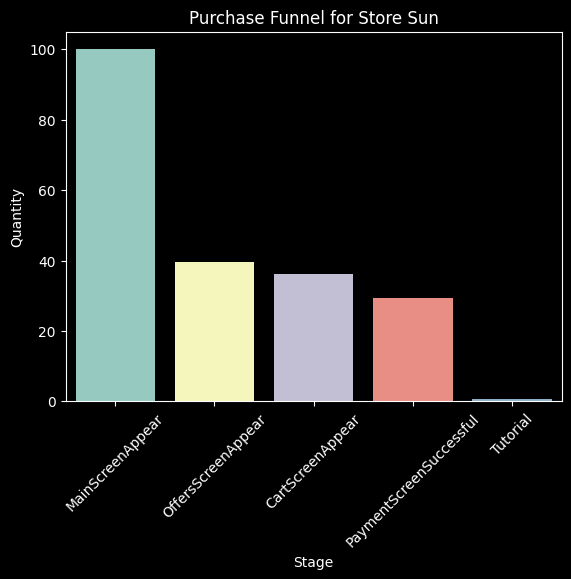

In [132]:
import seaborn as sns
plt.style.use("dark_background")

# Crear un gráfico de barras utilizando la librería seaborn
sns.barplot(x= 'Evento', y='Porcentaje', data=df_funnel)

# Agregar etiquetas y título al gráfico
plt.xlabel('Stage')
plt.ylabel('Quantity')
plt.title('Purchase Funnel for Store Sun')
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.show()

In [108]:
grupo_A246= df_filtrados[df_filtrados['ExpId'] == 246]

grupo_A247= df_filtrados[df_filtrados['ExpId'] == 247]

grupo_B248= df_filtrados[df_filtrados['ExpId'] == 248]

### Comparacion grupo A/A

In [109]:
usuarios_246 = grupo_A246['usuarioId'].nunique()
usuarios_247 = grupo_A247['usuarioId'].nunique()

conv_246 = grupo_A246[grupo_A246['evento'] == 'PaymentScreenSuccessful']['usuarioId'].nunique()
conv_247 = grupo_A247[grupo_A247['evento'] == 'PaymentScreenSuccessful']['usuarioId'].nunique()

In [110]:
tasa_246 = conv_246 / usuarios_246
tasa_247 = conv_247 / usuarios_247

In [111]:
from statsmodels.stats.proportion import proportions_ztest

# Valores para la prueba
successes = [conv_246, conv_247]
n_obs = [usuarios_246, usuarios_247]

stat, pval = proportions_ztest(count=successes, nobs=n_obs)

print(f"Tasa de conversión grupo 246: {tasa_246:.4f}")
print(f"Tasa de conversión grupo 247: {tasa_247:.4f}")
print(f"Estadístico z: {stat:.4f}, valor p: {pval:.4f}")

Tasa de conversión grupo 246: 0.4814
Tasa de conversión grupo 247: 0.4593
Estadístico z: 1.5366, valor p: 0.1244


In [112]:
def comparar_evento(evento, grupo_A246, grupo_A247, usuarios_246, usuarios_247):
    # Usuarios únicos que realizaron el evento en cada grupo
    conv_246 = grupo_A246[grupo_A246['evento'] == evento]['usuarioId'].nunique()
    conv_247 = grupo_A247[grupo_A247['evento'] == evento]['usuarioId'].nunique()

    # Tasa de conversión por grupo
    prop_246 = conv_246 / usuarios_246
    prop_247 = conv_247 / usuarios_247

    # Prueba z para comparar proporciones
    stat, pval = proportions_ztest([conv_246, conv_247], [usuarios_246, usuarios_247])

    return {
        'Evento': evento,
        'Usuarios_Grupo_246': conv_246,
        'Usuarios_Grupo_247': conv_247,
        'Proporcion_Grupo_246': prop_246,
        'Proporcion_Grupo_247': prop_247,
        'Z': stat,
        'p-value': pval
    }

In [113]:
eventos = grupo_A246['evento'].unique() 

resultados = [comparar_evento(e, grupo_A246, grupo_A247, usuarios_246, usuarios_247) for e in eventos]

df_resultados = pd.DataFrame(resultados)

In [114]:
df_significativos = df_resultados[df_resultados['p-value'] < 0.05]

if df_significativos.empty:
    print("No hay diferencias estadísticamente significativas. Los grupos A parecen estar bien divididos.")
else:
    print("Se encontraron diferencias significativas:")
    print(df_significativos)

Se encontraron diferencias significativas:
               Evento  Usuarios_Grupo_246  Usuarios_Grupo_247  \
3  OffersScreenAppear                1480                1438   

   Proporcion_Grupo_246  Proporcion_Grupo_247         Z   p-value  
3              0.618471              0.590797  1.966024  0.049296  


In [115]:
print(df_resultados)

                    Evento  Usuarios_Grupo_246  Usuarios_Grupo_247  \
0         MainScreenAppear                2355                2392   
1  PaymentScreenSuccessful                1152                1118   
2         CartScreenAppear                1213                1184   
3       OffersScreenAppear                1480                1438   
4                 Tutorial                 230                 227   

   Proporcion_Grupo_246  Proporcion_Grupo_247         Z   p-value  
0              0.984120              0.982744  0.374371  0.708129  
1              0.481404              0.459326  1.536560  0.124401  
2              0.506895              0.486442  1.420990  0.155320  
3              0.618471              0.590797  1.966024  0.049296  
4              0.096114              0.093262  0.338339  0.735108  


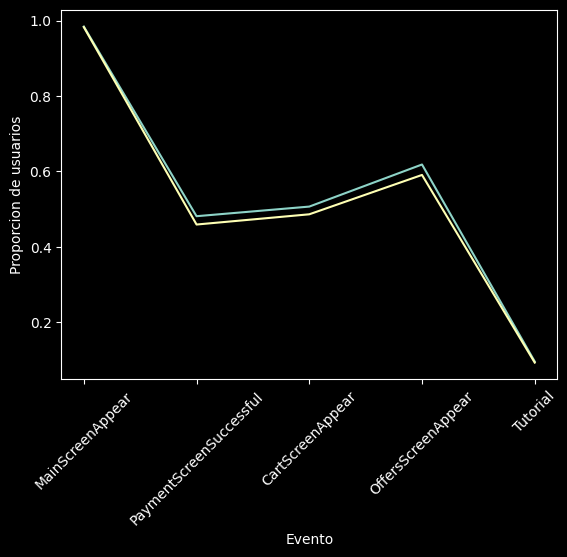

In [116]:
x = df_resultados['Evento']

plt.plot(x, df_resultados['Proporcion_Grupo_246'])
plt.plot(df_resultados['Proporcion_Grupo_247'])
plt.xlabel('Evento')
plt.ylabel('Proporcion de usuarios')
plt.xticks(rotation=45)
plt.show()
         

### Comparacion grupos A246/B

In [117]:
usuarios_248 = grupo_B248['usuarioId'].nunique()

conv_248 = grupo_B248[grupo_B248['evento'] == 'PaymentScreenSuccessful']['usuarioId'].nunique()

In [118]:
tasa_248 = conv_248 / usuarios_248

In [119]:
# Valores para la prueba
successes = [conv_246, conv_248]
n_obs = [usuarios_246, usuarios_248]

stat, pval = proportions_ztest(count=successes, nobs=n_obs)

print(f"Tasa de conversión grupo 246: {tasa_246:.4f}")
print(f"Tasa de conversión grupo 248: {tasa_248:.4f}")
print(f"Estadístico z: {stat:.4f}, valor p: {pval:.4f}")

Tasa de conversión grupo 246: 0.4814
Tasa de conversión grupo 248: 0.4591
Estadístico z: 1.5542, valor p: 0.1201


In [127]:
def comparar_evento_AB(evento, grupo_A246, grupo_B248, usuarios_246, usuarios_248):
    # Usuarios únicos que realizaron el evento en cada grupo
    conv_246 = grupo_A246[grupo_A246['evento'] == evento]['usuarioId'].nunique()
    conv_248 = grupo_B248[grupo_B248['evento'] == evento]['usuarioId'].nunique()

    # Tasa de conversión por grupo
    prop_246 = conv_246 / usuarios_246
    prop_248 = conv_248 / usuarios_248

    # Prueba z para comparar proporciones
    stat, pval = proportions_ztest([conv_246, conv_248], [usuarios_246, usuarios_248])

    return {
        'Evento': evento,
        'Usuarios_Grupo_246': conv_246,
        'Usuarios_Grupo_248': conv_248,
        'Proporcion_Grupo_246': prop_246,
        'Proporcion_Grupo_248': prop_248,
        'Z': stat,
        'p-value': pval
    }

In [128]:
resultados_AB = [comparar_evento_AB(e, grupo_A246, grupo_B248, usuarios_246, usuarios_248) for e in eventos]

df_resultados_AB = pd.DataFrame(resultados_AB)

In [129]:
df_significativos_AB = df_resultados_AB[df_resultados_AB['p-value'] < 0.05]

if df_significativos_AB.empty:
    print("No hay diferencias estadísticamente significativas. Los grupos A parecen estar bien divididos.")
else:
    print("Se encontraron diferencias significativas:")
    print(df_significativos_AB)

Se encontraron diferencias significativas:
             Evento  Usuarios_Grupo_246  Usuarios_Grupo_248  \
2  CartScreenAppear                1213                1174   

   Proporcion_Grupo_246  Proporcion_Grupo_248         Z  p-value  
2              0.506895               0.47743  2.052516  0.04012  


In [130]:
print(df_resultados_AB)

                    Evento  Usuarios_Grupo_246  Usuarios_Grupo_248  \
0         MainScreenAppear                2355                2409   
1  PaymentScreenSuccessful                1152                1129   
2         CartScreenAppear                1213                1174   
3       OffersScreenAppear                1480                1462   
4                 Tutorial                 230                 233   

   Proporcion_Grupo_246  Proporcion_Grupo_248         Z   p-value  
0              0.984120              0.979667  1.162295  0.245116  
1              0.481404              0.459130  1.554185  0.120140  
2              0.506895              0.477430  2.052516  0.040120  
3              0.618471              0.594551  1.705032  0.088188  
4              0.096114              0.094754  0.161169  0.871961  


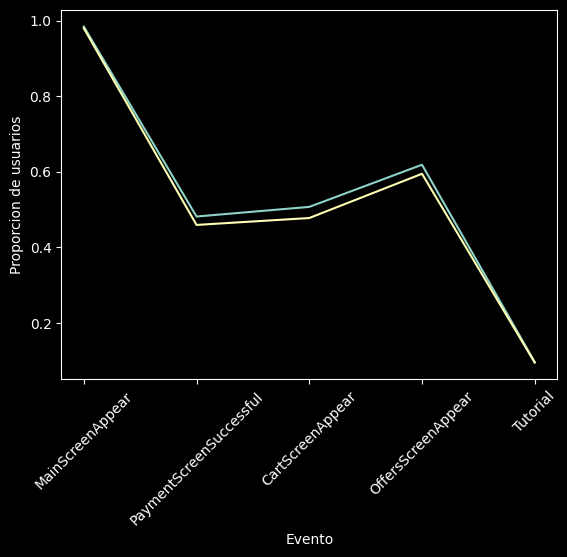

In [131]:
plt.plot(x, df_resultados_AB['Proporcion_Grupo_246'])
plt.plot(df_resultados_AB['Proporcion_Grupo_248'])
plt.xlabel('Evento')
plt.ylabel('Proporcion de usuarios')
plt.xticks(rotation=45)
plt.show()

### Comparacion grupos 247A/B

In [ ]:
# Valores para la prueba
successes = [conv_247, conv_248]
n_obs = [usuarios_247, usuarios_248]

stat, pval = proportions_ztest(count=successes, nobs=n_obs)

print(f"Tasa de conversión grupo 246: {tasa_247:.4f}")
print(f"Tasa de conversión grupo 248: {tasa_248:.4f}")
print(f"Estadístico z: {stat:.4f}, valor p: {pval:.4f}")

In [133]:
resultados_A247B = [comparar_evento_AB(e, grupo_A247, grupo_B248, usuarios_247, usuarios_248) for e in eventos]

df_resultados_A247B = pd.DataFrame(resultados_A247B)

In [134]:
df_significativos_A247B = df_resultados_A247B[df_resultados_A247B['p-value'] < 0.05]

if df_significativos_A247B.empty:
    print("No hay diferencias estadísticamente significativas. Los grupos A parecen estar bien divididos.")
else:
    print("Se encontraron diferencias significativas:")
    print(df_significativos_A247B)

No hay diferencias estadísticamente significativas. Los grupos A parecen estar bien divididos.


In [135]:
print(df_resultados_A247B)

                    Evento  Usuarios_Grupo_246  Usuarios_Grupo_248  \
0         MainScreenAppear                2392                2409   
1  PaymentScreenSuccessful                1118                1129   
2         CartScreenAppear                1184                1174   
3       OffersScreenAppear                1438                1462   
4                 Tutorial                 227                 233   

   Proporcion_Grupo_246  Proporcion_Grupo_248         Z   p-value  
0              0.982744              0.979667  0.792547  0.428042  
1              0.459326              0.459130  0.013790  0.988998  
2              0.486442              0.477430  0.630809  0.528165  
3              0.590797              0.594551 -0.267191  0.789322  
4              0.093262              0.094754 -0.178782  0.858109  


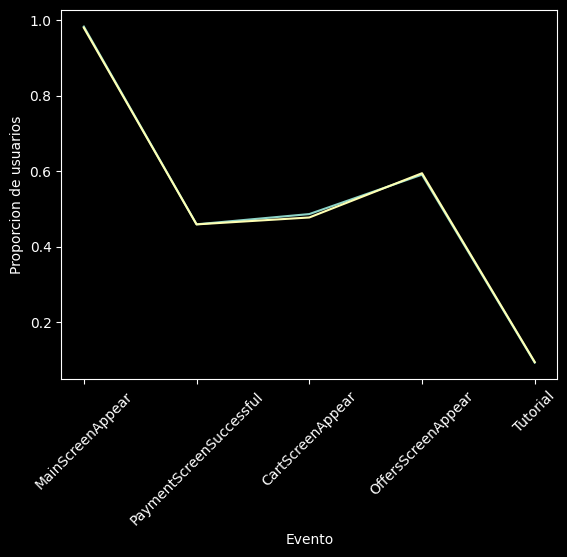

In [136]:
plt.plot(x, df_resultados_A247B['Proporcion_Grupo_246'])
plt.plot(df_resultados_A247B['Proporcion_Grupo_248'])
plt.xlabel('Evento')
plt.ylabel('Proporcion de usuarios')
plt.xticks(rotation=45)
plt.show()

# Cocluciones finales

Se propone que el orden de los eventos son el siguiente:
1. Tutorial  
2. Main Screen Appear / Pantalla principal    
3. Offers Screen Appear / Pantalla de ofertas        
4. Cart Screen Appear / Pantalla del carrito 
5. Payment Screen Successful / Pantalla de pago exitosa
Sin embargo, se intuiye que la mayoria de usuarios saltan el tutorial, estos datos tambien podrian ser influenciados por usuarios antiguos que ya realizaron el tutoria anteriormente.
No se observo una diferencia significativa entre la proporcion de usuarios que termino cada evento entre ninguno de los grupos, se concluye que los experimentos no cambiaron el comportamiento de los usuarios, sin embargo, el grupo B recibio una mayor cantidad de usuarios y por lo tanto tubo mas ventas concluidas, sin embargo, se requieren mas datos para obtener concluciones sobre esto. Por el momento, se concluye que no hay diferencia significativa entre el comportamiento de los usuarios en cada grupo.


# Comentario General del Revisor

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente manejo del flujo de datos en un experimento de tipo A/A/B, aplicando análisis exploratorio, visualización efectiva y pruebas estadísticas con buena estructura. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:

---

#### ✅ Puntos Positivos:

* **Carga y limpieza de datos:** El renombramiento de columnas, el control de valores nulos y la conversión de fechas están bien implementados. También se creó correctamente una columna para agrupar por hora, útil para entender patrones diarios.

* **Exploración y visualización:** Usaste gráficas de barras, histogramas y funnels de conversión con claridad, lo que aporta mucho valor a la interpretación del comportamiento de los usuarios.

* **Estructura experimental A/A/B:** Evaluaste la consistencia entre los grupos A antes de comparar con el grupo B, aplicando pruebas z por evento, lo cual es una excelente práctica en experimentación digital.

* **Análisis crítico:** En tus conclusiones, reconoces la posible omisión del tutorial por parte de los usuarios y sugieres que algunos resultados podrían deberse al azar o requerir más datos, lo cual muestra buen criterio analítico.

---

#### ⚠️ Áreas para Mejorar:


* **Redacción de conclusiones:** Hay afirmaciones que suenan demasiado definitivas (por ejemplo, “los experimentos no cambiaron el comportamiento”), cuando en realidad los resultados sugieren que no hubo suficiente evidencia para detectar cambios. Es mejor usar expresiones más cuidadosas como *“no se encontraron diferencias significativas”* o *“se requiere una muestra más grande para confirmar resultados”* así mismo tener cuidado pues se escribio "Cocluciones" lo cuál es un error que podría restar credibilidad en un ambiente profesional. 

* **Pruebas estadísticas múltiples:** Algunos resultados son marginalmente significativos (p ≈ 0.049). En contextos profesionales, sería recomendable usar correcciones por comparaciones múltiples (como Bonferroni) para evitar falsos positivos.



</div>
